In [37]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plot_utils_philipp import *


#DATA_PATH = '../results/cleanup_5agents.pkl'
#DATA_PATH = '../results/harvest_5agents.pkl'

def get_plot_dict_1(result_path: str, env: str) -> None:        
    def compute_gini_coefficient_with_negative_rewards_shifted(rewards):
        # compute Gini coefficient handling negative values by shifting the rewards 
        # distribution to make all values positive
        shift_value = abs(min(rewards)) + 1e-5  # small epsilon to ensure no zero value
        shifted_rewards = [r + shift_value for r in rewards]        
        # compute Gini coefficient for shifted rewards
        sorted_rewards = sorted(shifted_rewards)
        n = len(sorted_rewards)
        numer = sum([(i + 1) * reward for i, reward in enumerate(sorted_rewards)])
        denom = n * sum(sorted_rewards)        
        if denom == 0:
            return 0
        else:
            return (2 * numer / denom) - (n + 1) / n

    # Load data from the pickle file
    with open(result_path, 'rb') as f:
        data = pd.read_pickle(f)    
    # extracting model names and their corresponding rewards data
    model_names = [list(item.keys())[0] for item in data]
    model_rewards = [list(item.values())[0] for item in data]
   
    # compute average total population return and standard error for each model
    average_returns = []
    standard_errors = []
    for rewards in model_rewards:
        # Calculate total return for each episode
        episode_totals = [sum([episode[agent].sum() for agent in episode]) for episode in rewards]        
        # Compute average and standard error
        average_returns.append(np.mean(episode_totals))
        standard_errors.append(np.std(episode_totals) / np.sqrt(len(episode_totals)))
    # Compute average Gini coefficient for each model
    average_ginis = []
    standard_errors_gini = []
    for rewards in model_rewards:
        # get the difference between 1 and the Gini coefficient 
        gini_values = [
            1 - compute_gini_coefficient_with_negative_rewards_shifted([
                episode[agent].sum() for agent in episode
                ]) for episode in rewards
            ]
        average_ginis.append(np.mean(gini_values))
        standard_errors_gini.append(np.std(gini_values) / np.sqrt(len(gini_values)))
    
    if env == 'cleanup':
        model_names2plot = {
            'ppo': 'PPO',
            'im_reward': 'ICM Reward',
            'icm': 'ICM',        
            'social_influence_visible': 'Social Influence',
            'SVO_hetero_75': 'SVO \nHeterogeneous',
            'SVO_homog_30': 'SVO \nHomogeneous'
        }
    elif env == 'harvest':
        model_names2plot = {
            'ppo': 'PPO',
            'im_reward': 'ICM Reward',
            'icm': 'ICM',        
            'social_influence_visible': 'Social Influence',
            'SVO_hetero_15': 'SVO \nHeterogeneous',
            'SVO_homog_30': 'SVO \nHomogeneous'
        }

    # take subset of average returns and standard errors based on model_names2plot
    average_returns_plot = []
    standard_errors_plot = []
    average_ginis_plot = []
    standard_errors_gini_plot = []    
    #for i, avg_return in enumerate(average_returns):
    for model_name in model_names2plot.keys():
        i = model_names.index(model_name)                
        average_returns_plot.append(average_returns[i])
        standard_errors_plot.append(standard_errors[i])
        average_ginis_plot.append(average_ginis[i])
        standard_errors_gini_plot.append(standard_errors_gini[i])
    model_names_plot = list(model_names2plot.keys())
    model_labels = list(model_names2plot.values())

    plot_dict_1 = {
        'x': model_names_plot,
        'y': average_returns_plot,
        'yerr': standard_errors_plot,
    }

    plot_dict_2 = {
        'x': model_names_plot,
        'y': average_ginis_plot,
        'yerr': standard_errors_gini_plot,
    }

    return plot_dict_1, plot_dict_2, model_labels

def get_plot_dict_2(result_path: str) -> None:        
    def compute_gini_coefficient_with_negative_rewards_shifted(rewards):
        # compute Gini coefficient handling negative values by shifting the rewards 
        # distribution to make all values positive
        shift_value = abs(min(rewards)) + 1e-5  # small epsilon to ensure no zero value
        shifted_rewards = [r + shift_value for r in rewards]        
        # compute Gini coefficient for shifted rewards
        sorted_rewards = sorted(shifted_rewards)
        n = len(sorted_rewards)
        numer = sum([(i + 1) * reward for i, reward in enumerate(sorted_rewards)])
        denom = n * sum(sorted_rewards)        
        if denom == 0:
            return 0
        else:
            return (2 * numer / denom) - (n + 1) / n

    # Load data from the pickle file
    with open(result_path, 'rb') as f:
        data = pd.read_pickle(f)    
    # extracting model names and their corresponding rewards data
    model_names = [list(item.keys())[0] for item in data]
    model_rewards = [list(item.values())[0] for item in data]
    # compute average total population return and standard error for each model
    average_returns = []
    standard_errors = []
    for rewards in model_rewards:
        # Calculate total return for each episode
        episode_totals = [sum([episode[agent].sum() for agent in episode]) for episode in rewards]        
        # Compute average and standard error
        average_returns.append(np.mean(episode_totals))
        standard_errors.append(np.std(episode_totals) / np.sqrt(len(episode_totals)))
    # Compute average Gini coefficient for each model
    average_ginis = []
    standard_errors_gini = []
    for rewards in model_rewards:
        # get the difference between 1 and the Gini coefficient 
        gini_values = [
            1 - compute_gini_coefficient_with_negative_rewards_shifted([
                episode[agent].sum() for agent in episode
                ]) for episode in rewards
            ]
        average_ginis.append(np.mean(gini_values))
        standard_errors_gini.append(np.std(gini_values) / np.sqrt(len(gini_values)))

    # Create a dictionary
    data = {
        'Model': model_names,
        'Average Returns': average_returns,
        'Standard Errors': standard_errors,
        'Average Gini Coefficients': average_ginis,
        'Standard Errors Gini': standard_errors_gini
    }
    df = pd.DataFrame(data)
    # Filter rows based on 'Model'
    filtered_df = df[df['Model'].str.contains('SVO|svo', case=False)]
    # Create a new column for 'Heterogeneous' or 'Homogeneous'
    filtered_df['Type'] = ['Heterogeneous' if 'hetero' in model or 'heter' in model else 'Homogeneous' for model in filtered_df['Model']]
    # Create a new column to hold the degree (the last number in the 'Model')
    filtered_df['degree'] = filtered_df['Model'].str.extract(r'(\d+)$')[0].astype(int)


    # Sort the DataFrame by 'degree' and then by 'Type'
    sorted_df = filtered_df.sort_values(by=['degree', 'Type'])
    # Extract the sorted standard errors into a list
    sorted_standard_errors = sorted_df['Standard Errors'].tolist()
    sorted_gini_standard_errors = sorted_df['Standard Errors Gini'].tolist()

    return {
        'altruism_degree': sorted_df['degree'].tolist(),
        'altruism_returns': sorted_df['Average Returns'].tolist(),
        'altruism_avg_gini': sorted_df['Average Gini Coefficients'].tolist(),        
        'altruism_standard_errors': sorted_standard_errors,
        'alturism_gini_standard_errors': sorted_gini_standard_errors,
    }

# plot_dicts_1 = get_plot_dict_1(DATA_PATH)
# plot_dicts_2 = get_plot_dict_2(DATA_PATH)

In [38]:
def plot_population_return(data, plt_name, palette, env):
    plt.rcParams["font.family"] = "Avenir"
    plt.rcParams["font.size"] = 24
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.75
    error_bar_color = 'black'
    
    # Initial bar plotting
    bars = []  # Keep references to the bar objects
    
    for i, model in enumerate(data['x']):
        z = 0
        if i == 4:
            bar = ax.bar(model, data['y'][i], bar_width, color=change_saturation(palette[0]), capsize=1, label=model)
        elif i == 5:
            bar = ax.bar(model, data['y'][i], bar_width, color=change_saturation(palette[1]), capsize=1, label=model)
        else:
            bar = ax.bar(model, data['y'][i], bar_width, color=change_saturation(palette[i + 2]), capsize=1, label=model)

        bars.append(bar)
        
    # Creating Fancy Bboxes and Error Bars
    for i, bar_container in enumerate(bars):
        for bar in bar_container:
            bb = bar.get_bbox()
            color = bar.get_facecolor()
            # Creating a fancy bbox
            p_bbox = get_fancy_bbox(bb, "round,pad=-.01,rounding_size=0.005", color, mutation_aspect=50, zorder=2)
            ax.add_patch(p_bbox)
            bar.remove()  # Remove the original bar
            
            # Adding error bars
            x_center = bb.xmin + (bb.xmax - bb.xmin) / 2
            lighter_bar_color = lighten_color(error_bar_color, 0.8)
            ax.errorbar(x_center, bar.get_height(), yerr=data['yerr'][i], color=lighter_bar_color, capsize=1, ls='none', elinewidth=2, zorder=40)

    # Other plotting logic remains unchanged
    sns.despine(left=True, bottom=False)
    plt.xlabel('')
    ax.set_yticks([-50, 0, 50, 100, 150, 200, 250])
    ax.set_xticklabels(['PPO', 'ICM-R', 'ICM',  'Social', 'SVO-HE', 'SVO-HO'], size=20)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
    ax.set_ylabel('Average Return')
    ax.yaxis.set_label_coords(-0.09, 0.5)
    plt.tick_params(axis='y', length=0)
    if env == 'harvest':
        y_lim_upper = 800
    else:
        y_lim_upper = 275

    plt.ylim(0, y_lim_upper)
    fig.tight_layout()
    plt.savefig(f'{plt_name}.pdf')
    plt.savefig(f'{plt_name}.png', dpi=300)
    plt.show()


# palette = sns.color_palette('colorblind')
# plot_population_return(plot_dicts_1[0], 'population_return_1', palette)


In [39]:
def plot_population_equity(data, plt_name, palette):
    plt.rcParams["font.family"] = "Avenir"
    plt.rcParams["font.size"] = 24
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.75
    error_bar_color = 'black'
    
    # Initial bar plotting
    bars = []  # Keep references to the bar objects
    z = 0
    for i, model in enumerate(data['x']):
        if i == 4:
            z = -6
        elif i == 5:
            z = -6
        bar = ax.bar(model, data['y'][i], bar_width, color=change_saturation(palette[i + 2 + z]), capsize=1, label=model)
        bars.append(bar)
        
    # Creating Fancy Bboxes and Error Bars
    for i, bar_container in enumerate(bars):
        for bar in bar_container:
            bb = bar.get_bbox()
            color = bar.get_facecolor()
            # Creating a fancy bbox
            p_bbox = get_fancy_bbox(bb, "round,pad=-.0001,rounding_size=0.005", color, mutation_aspect=0.5, zorder=2)
            ax.add_patch(p_bbox)
            bar.remove()  # Remove the original bar
            
            # Adding error bars
            x_center = bb.xmin + (bb.xmax - bb.xmin) / 2
            lighter_bar_color = lighten_color(error_bar_color, 0.8)
            ax.errorbar(x_center, bar.get_height(), yerr=data['yerr'][i], color=lighter_bar_color, capsize=1, ls='none', elinewidth=2, zorder=40)

        
    # Other plotting logic remains unchanged
    sns.despine(left=True, bottom=False)
    plt.xlabel('')
    ax.set_yticks([0, 0.2, .4, .6, .8, 1.0])
    ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
    ax.set_xticklabels(['PPO', 'ICM-R', 'ICM',  'Social', 'SVO-HE', 'SVO-HO'], size=20)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
    ax.set_ylabel('Equity (1 - GiniCo)')
    ax.yaxis.set_label_coords(-0.09, 0.5)
    plt.tick_params(axis='y', length=0)
    plt.ylim(-.05, 1.1)
    fig.tight_layout()
    plt.savefig(f'{plt_name}.pdf')
    plt.savefig(f'{plt_name}.png', dpi=300)
    plt.show()


# palette = sns.color_palette('colorblind')
# plot_population_equity(plot_dicts_1[1], 'population_return_2', palette)


In [40]:
def plot_population_altruism_return(data, plt_name, palette, env):
    plt.rcParams["font.family"] = "Avenir"
    plt.rcParams["font.size"] = 24
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.75
    error_bar_color = 'black'

    index = np.arange(len(data['altruism_degree']))
    
    for i, key in enumerate(data['altruism_degree']):
        
        if i in [0, 2, 4, 6, 8]:
            ax.bar(index[i] - bar_width / 2 - .01, data['altruism_returns'][i], bar_width, color=change_saturation(palette[0]))
            ax.bar(index[i] + bar_width / 2 + .01, data['altruism_returns'][i + 1], bar_width, color=change_saturation(palette[1]))


    for patch in ax.patches:
        bb = patch.get_bbox()
        color = patch.get_facecolor()
        p_bbox = get_fancy_bbox(bb, "round,pad=-0.005,rounding_size=0.05", color, mutation_aspect=20)
        patch.remove()
        ax.add_patch(p_bbox)

    for i, bar in enumerate(ax.patches):
        lighter_bar_color = lighten_color(error_bar_color, 0.8)
        # Adding error bars
        ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=data['altruism_standard_errors'][i], color=lighter_bar_color, capsize=1, ls='none', elinewidth=2, zorder=40)
    
    # Other plotting logic remains unchanged
    sns.despine(left=True, bottom=False)
    plt.xlabel('')
    ax.set_yticks([0, 50, 100, 150, 200, 250])
    ax.set_xticks([0, 2, 4, 6, 8])
    ax.set_xticklabels(['15', '30', '45', '60', '75'])    
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
    # set x label
    # ax.set_xlabel('S')
    ax.set_ylabel('Population Return')
    ax.yaxis.set_label_coords(-0.09, 0.5)
    plt.tick_params(axis='y', length=0)

    if env == 'harvest':
        y_lim_upper = 800
    else:
        y_lim_upper = 275
        
    plt.ylim(0, y_lim_upper)
    fig.tight_layout()
    plt.savefig(f'{plt_name}.pdf')
    plt.savefig(f'{plt_name}.png', dpi=300)
    plt.show()


# palette = sns.color_palette('colorblind')
# plot_population_altruism_return(plot_dicts_2, 'altruism_return_1', palette)


In [41]:
def plot_population_altruism_equity(data, plt_name, palette):
    plt.rcParams["font.family"] = "Avenir"
    plt.rcParams["font.size"] = 24
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.75
    error_bar_color = 'black'

    index = np.arange(len(data['altruism_degree']))
    
    for i, key in enumerate(data['altruism_degree']):
        
        if i in [0, 2, 4, 6, 8]:
            ax.bar(index[i] - bar_width / 2 - .01, data['altruism_avg_gini'][i], bar_width, color=change_saturation(palette[0]))
            ax.bar(index[i] + bar_width / 2 + .01, data['altruism_avg_gini'][i + 1], bar_width, color=change_saturation(palette[1]))


    for patch in ax.patches:
        bb = patch.get_bbox()
        color = patch.get_facecolor()
        p_bbox = get_fancy_bbox(bb, "round,pad=-0.00005,rounding_size=0.02", color, mutation_aspect=0.5)
        patch.remove()
        ax.add_patch(p_bbox)

    for i, bar in enumerate(ax.patches):        
        lighter_bar_color = lighten_color(error_bar_color, 0.8)
        # Adding error bars
        ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), yerr=data['alturism_gini_standard_errors'][i], color=lighter_bar_color, capsize=1, ls='none', elinewidth=2, zorder=40)

    
    # Other plotting logic remains unchanged
    sns.despine(left=True, bottom=False)
    plt.xlabel('')
    ax.set_yticks([0, 0.2, .4, .6, .8, 1.0])
    ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
    ax.set_xticks([0, 2, 4, 6, 8])
    ax.set_xticklabels(['15', '30', '45', '60', '75'])
    # ax.set_xticklabels(['PPO', 'ICM', 'ICM-R', 'Social', 'SVO-HO', 'SVO-HE'], size=20)
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)

    ax.set_ylabel('Equity (1 - GiniCo)')
    ax.yaxis.set_label_coords(-0.09, 0.5)
    plt.tick_params(axis='y', length=0)    
        
    plt.ylim(-.05, 1.1)
    fig.tight_layout()
    plt.savefig(f'{plt_name}.pdf')
    plt.savefig(f'{plt_name}.png', dpi=300)
    plt.show()


# palette = sns.color_palette('colorblind')
# plot_population_altruism_return(plot_dicts_2, 'altruism_return_2', palette)


findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not

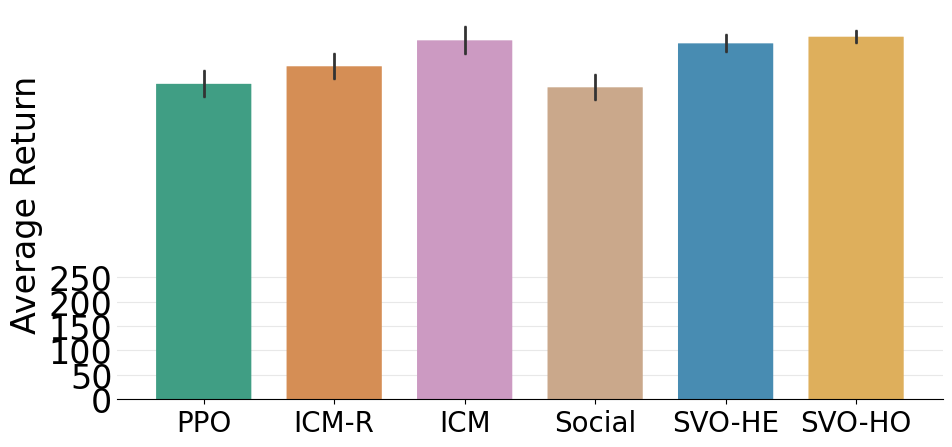

findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not

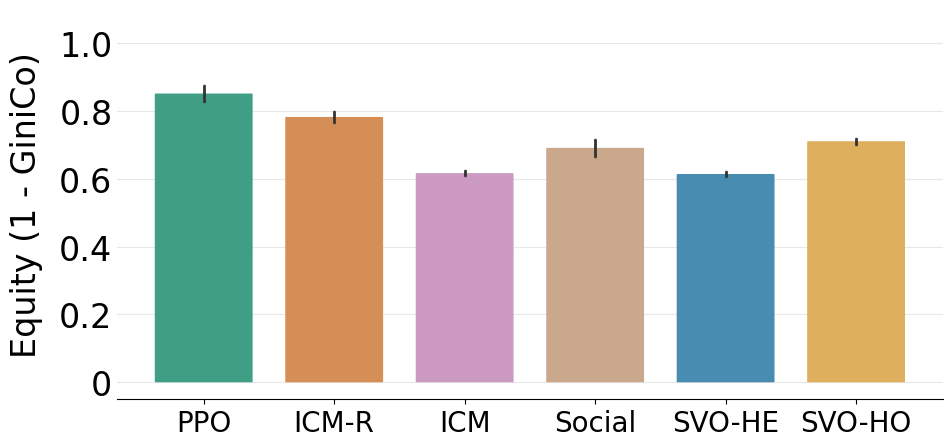

findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not

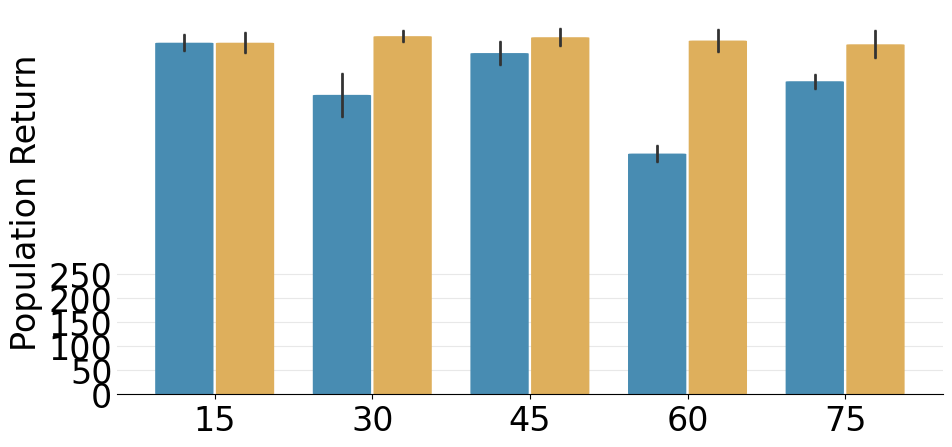

findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not

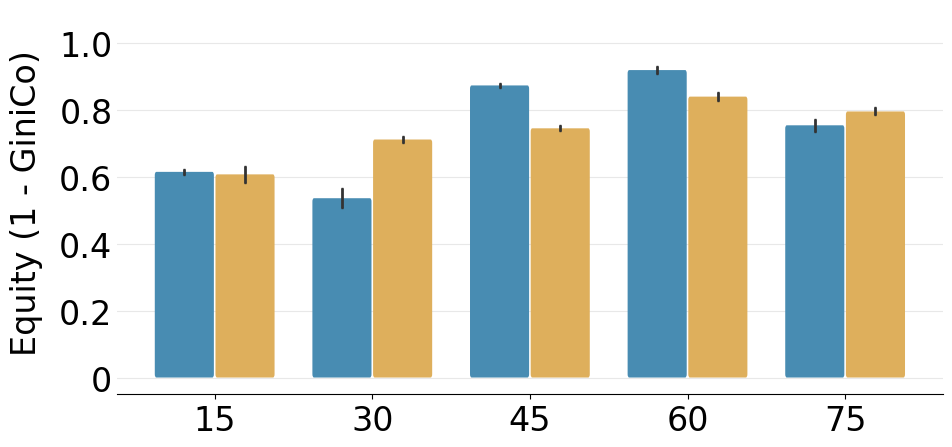

In [42]:
def plot_results(result_path):
    env = 'harvest' if 'harvest' in result_path else 'cleanup'
    # data for all models
    plot_dicts_1 = get_plot_dict_1(result_path, env)    
    # population return
    palette = sns.color_palette('colorblind')    
    plot_population_return(plot_dicts_1[0], 'population_return_1', palette, env)
    # equity    
    plot_population_equity(plot_dicts_1[1], 'population_return_2', palette)
    # data for population return & equity for SVO models    
    plot_dicts_2 = get_plot_dict_2(result_path)
    plot_population_altruism_return(plot_dicts_2, 'altruism_return_1', palette, env)
    plot_population_altruism_equity(plot_dicts_2, 'altruism_return_2', palette)

result_path = '../results/harvest_5agents.pkl'
plot_results(result_path)